In [1]:
import gdal
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
%matplotlib inline
import ee
import folium
import numpy as np
import pandas as pd
import proplot as plot
from pandas.plotting import register_matplotlib_converters
import tarfile
import re
import glob
from os import listdir


service_account = 'nattawat@geeproject-313808.iam.gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account, 'key.json')
ee.Initialize(credentials)

In [2]:
# Define variables
data_path_B8 = "C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B8/"
data_path_B4 = "C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B4/"
data_path_B3 = "C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B3/"
data_path_B2 = "C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B2/"

# List files with the tar.gz extension in the data/ directory
tar_list_B8 = glob.glob(data_path_B8 + '*.tif')
tar_list_B4 = glob.glob(data_path_B4 + '*.tif')
tar_list_B3 = glob.glob(data_path_B3 + '*.tif')
tar_list_B2 = glob.glob(data_path_B2 + '*.tif')

b8 = []
b4 = []
b3 = []
b2 = []
for i8 in tar_list_B8:
    print(i8)
    image = rasterio.open(i8)
    img_b8 = image.read(1).astype('f4') #dataset to array
    b8.append(img_b8) 

for i4 in tar_list_B4:
    print(i4)
    image = rasterio.open(i4)
    img_b4 = image.read(1).astype('f4') #dataset to array
    b4.append(img_b4) 

for i3 in tar_list_B3:
    print(i3)
    image = rasterio.open(i3)
    img_b3 = image.read(1).astype('f4') #dataset to array
    b3.append(img_b3) 

for i2 in tar_list_B2:
    print(i2)
    image = rasterio.open(i2)
    img_b2 = image.read(1).astype('f4') #dataset to array
    b2.append(img_b2) 

C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B8\B8_0.tif
C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B8\B8_1.tif
C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B8\B8_2.tif
C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B4\B4_0.tif
C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B4\B4_1.tif
C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B4\B4_2.tif
C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B3\B3_0.tif
C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B3\B3_1.tif
C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B3\B3_2.tif
C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B2\B2_0.tif
C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B2\B2_1.tif
C:/Users/frong/LISTEN_/NDVI_CAL/Image/image_band/B2\B2_2.tif


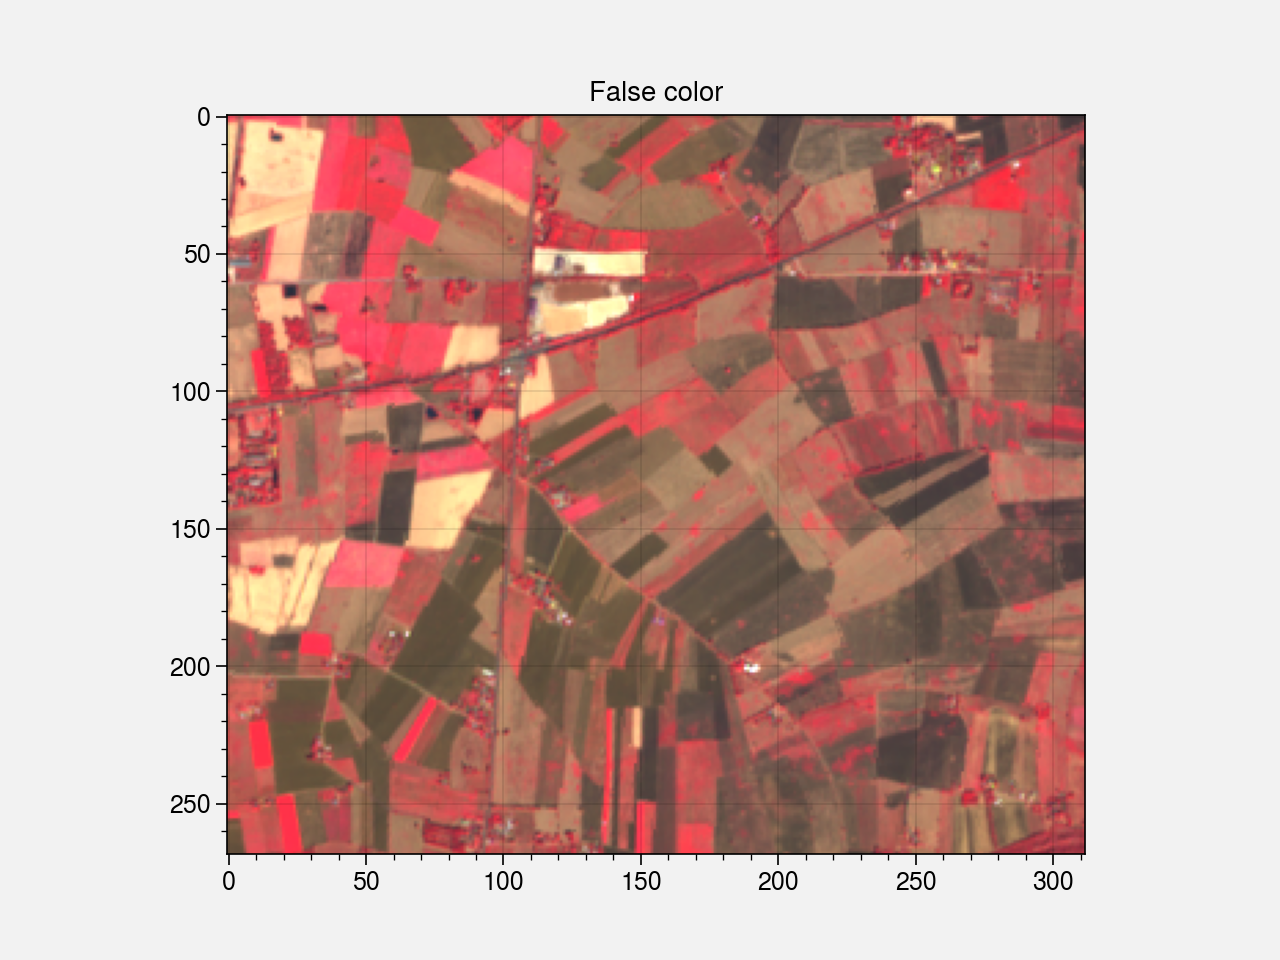

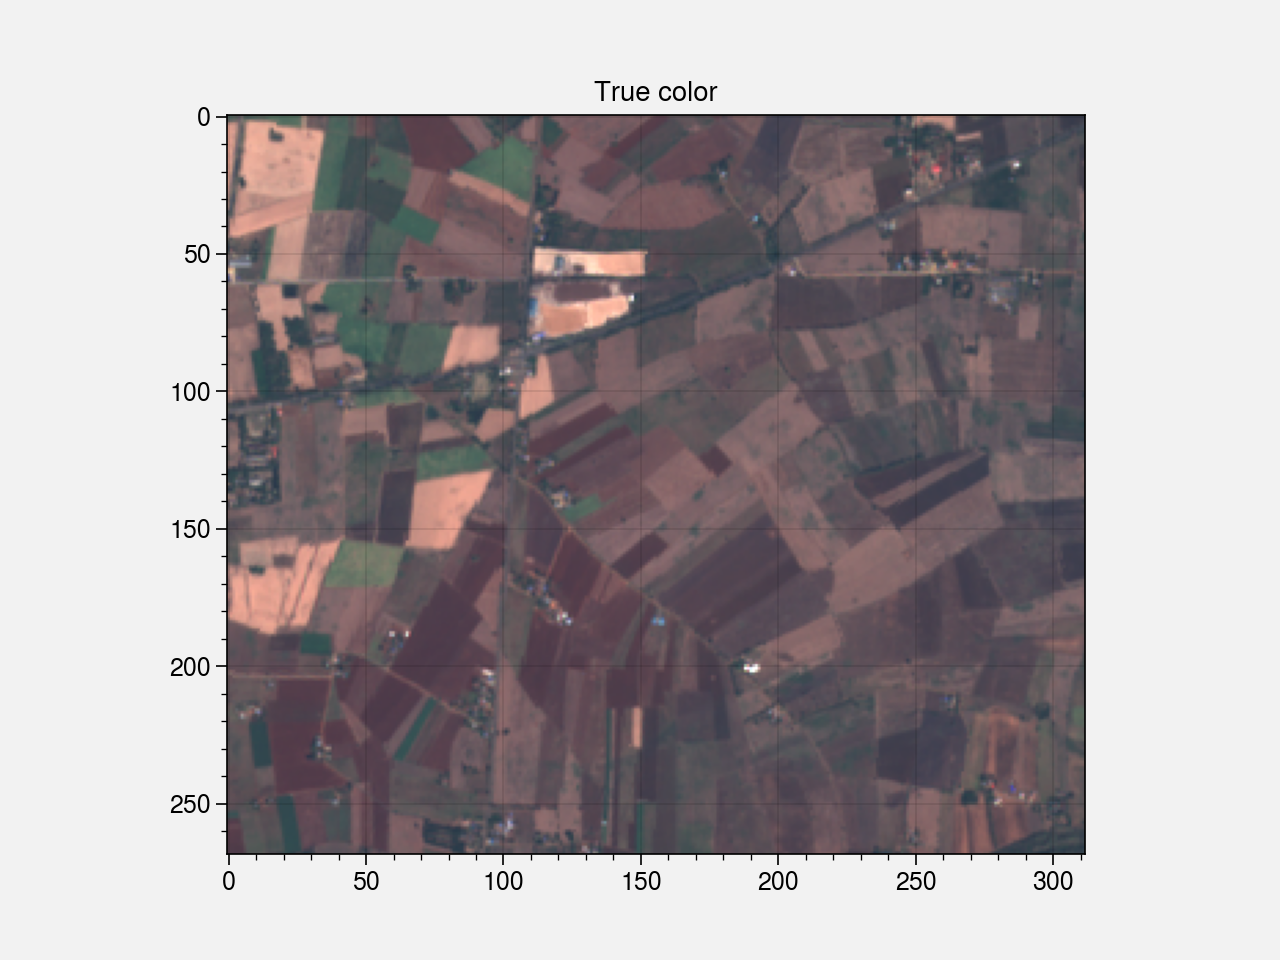

In [3]:
false_color = np.zeros((b4[0].shape[0],b4[0].shape[1],3),dtype=np.uint8)
true_color = np.zeros((b4[0].shape[0],b4[0].shape[1],3),dtype=np.uint8)
#test 3 band false and true color
false_color[:,:,0] = b8[0]
false_color[:,:,1] = b4[0]
false_color[:,:,2] = b3[0]
plt.title('False color')
plt.imshow(false_color)
plt.show()

true_color[:,:,0] = b4[0]
true_color[:,:,1] = b3[0]
true_color[:,:,2] = b2[0]
plt.title('True color')
plt.imshow(true_color)
plt.show()


Sum of nan values :  0
NDVI max : 0.7229729890823364
NDVI min:-0.12087912112474442


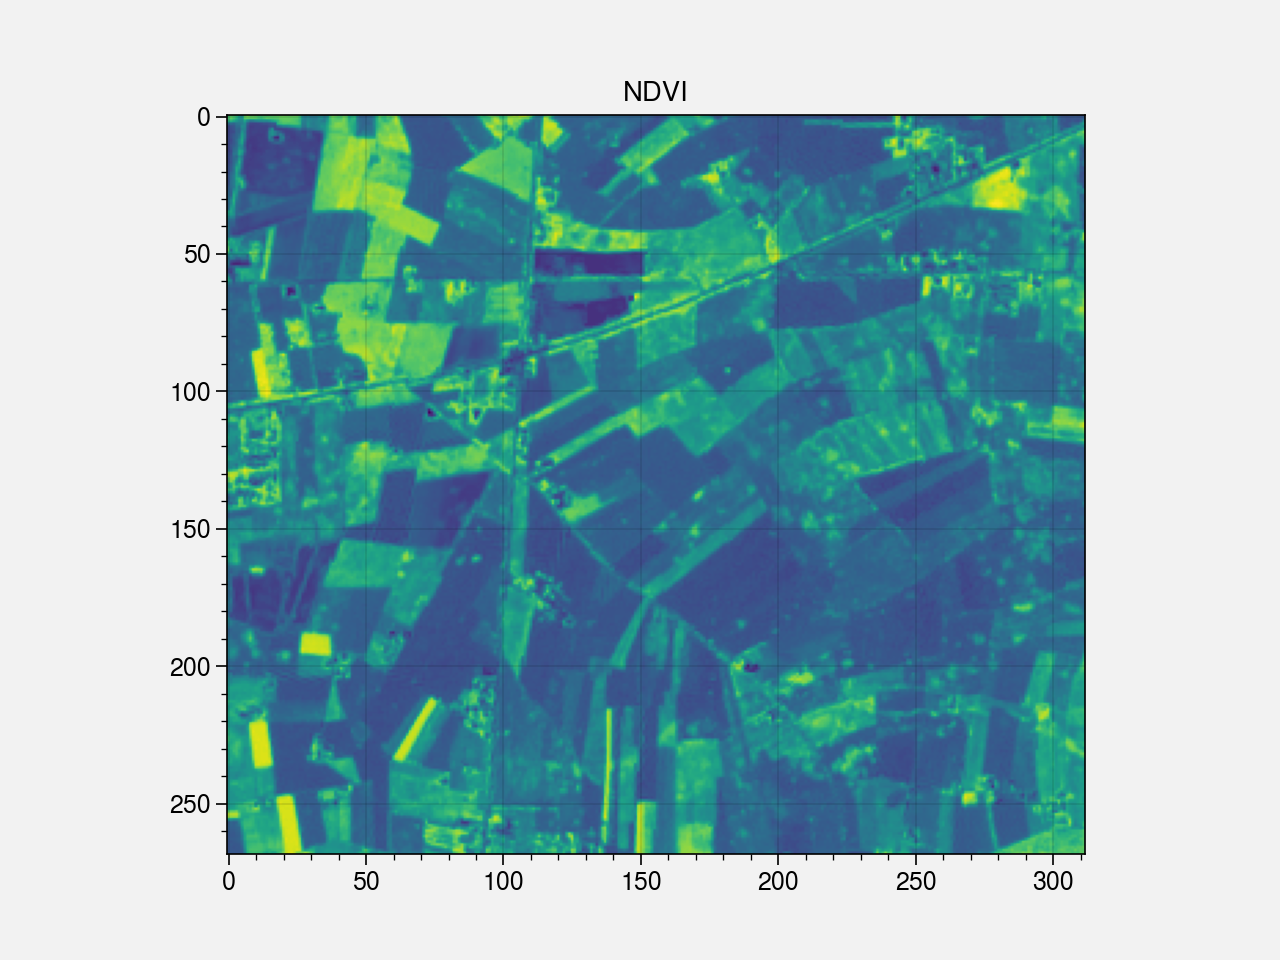

Sum of nan values :  0
NDVI max : 0.608832836151123
NDVI min:-0.09956710040569305


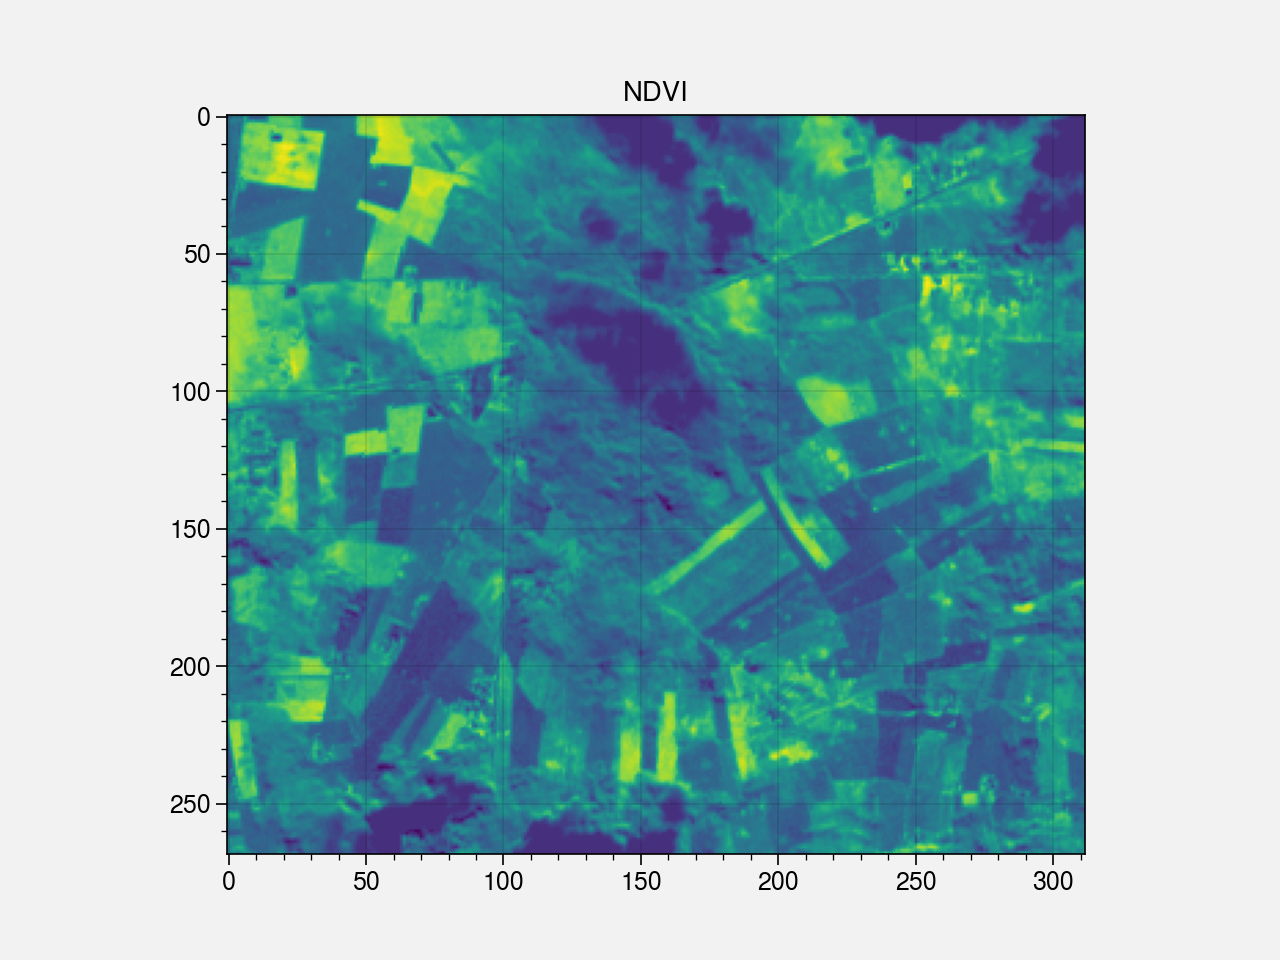

Sum of nan values :  0
NDVI max : 0.5789473652839661
NDVI min:0.005917159840464592


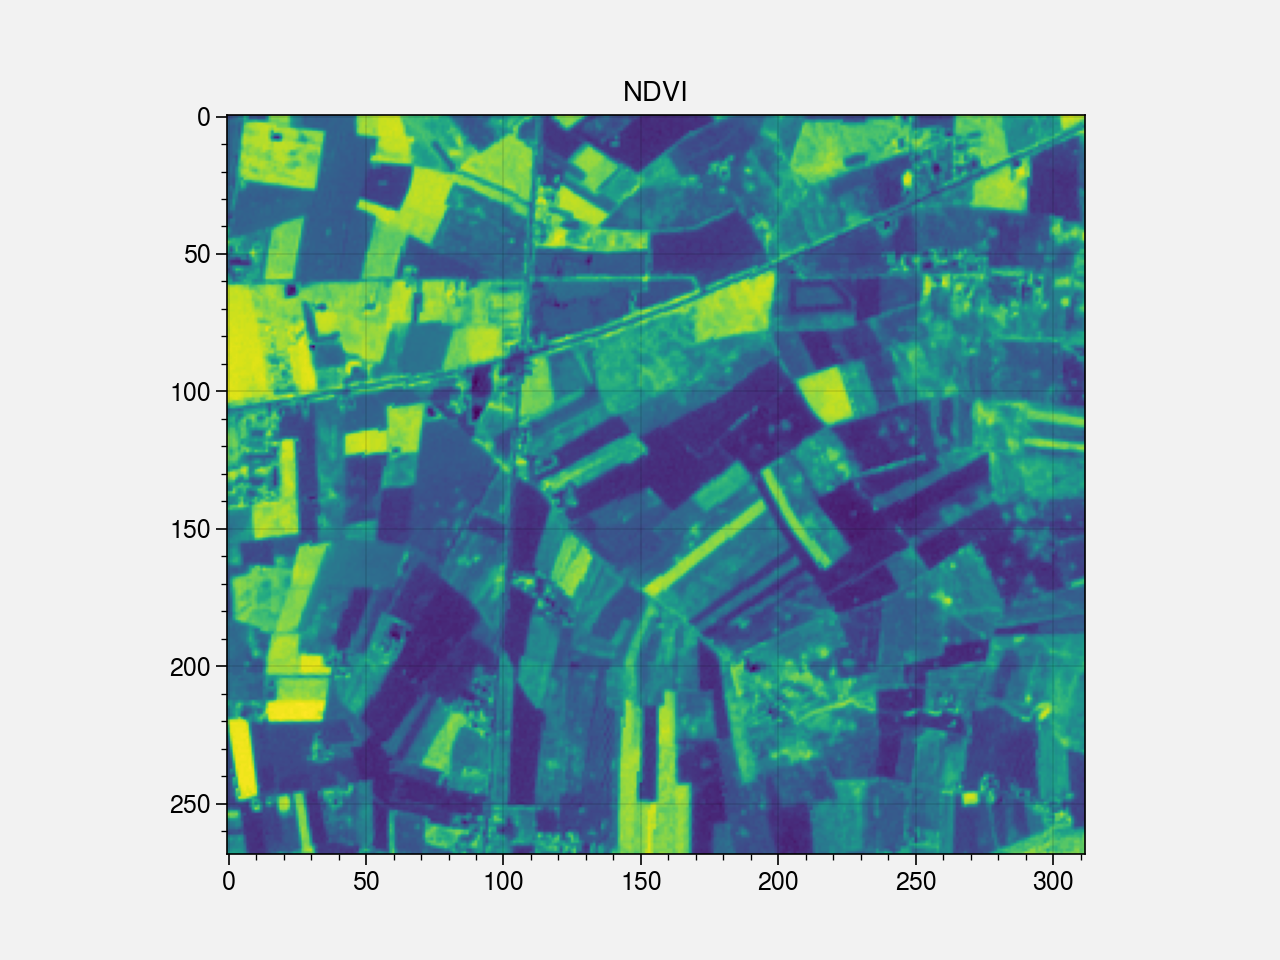

In [4]:
ndvi = []
np.seterr(divide='ignore', invalid='ignore') # Allow division by zero
for i in range(len(b8)):
    a = (b8[i] - b4[i]) / (b8[i] + b4[i])
    print('Sum of nan values : ',np.sum(np.isnan(a)))
    a = np.nan_to_num(a,nan = -1)
    
    ndvi.append(a)
    print(f'NDVI max : {np.max(ndvi[i])}\nNDVI min:{np.min(ndvi[i])}')
    plt.title('NDVI')
    plt.imshow(a,cmap="viridis")
    plt.show()